# A high-level API for statistical graphics

<!-- There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter that lets you easily switch to this alternate representation: -->

seaborn은 일관된 데이터셋을 지향하는 API로 각자 다른 시각적 표현방법을 자유자재로 사용할 수있게함.

relplot() 메서드는 다양한 통계적 관계를 표현하기 위해 만들어짐. scatter 메서드가 더효과적일 떄도 있지만,
변수들중에 시계열을 포함하는 변수가 있으면 선으로 표현하는 것이 효과적임.

relplot() 메서드는 대체되어 표현될 수 있는 편리한 종류의 인자가 많다
대체되어 표현될 수 있는 => 다른 시각화표현을 말하는 듯함

In [ ]:
# dots = sns.load_dataset("dots")
# sns.relplot(
#     data=dots, kind="line",
#     x="time", y="firing_rate", col="align",
#     hue="choice", size="coherence", style="choice",
#     facet_kws=dict(sharex=False),
# )

#coherence => 일관성

In [17]:
%matplotlib inline

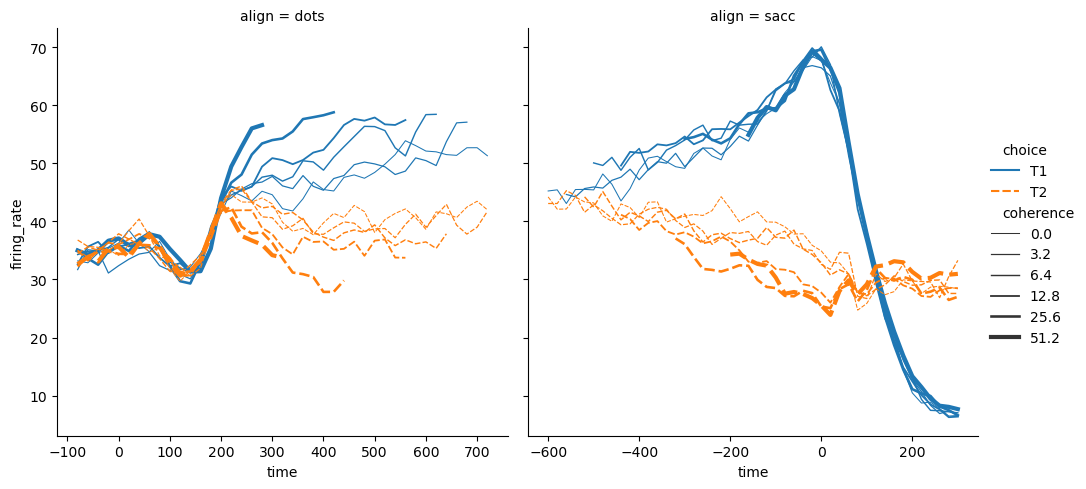

In [18]:
import seaborn as sns
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

<!-- Notice how the size and style parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey. -->

'size' 와 'style' 인자는 scatter와 line plot에 모두 사용 되지만 각각 시각화에 다른 영향을 끼침
scatter plot : 마커영역 및 기호 변경
line plot : 선의 너비 및 대시
중요한 건 세세한 디테일에 신경쓰기보단
플롯의 전체적인 구조와 정보의 전달에 집중하자

# Statistical estimation

<!-- Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions: -->

In [ ]:
다른 변수의 함수로써 한 변수의 평균에 관심이 있다.

In [ ]:
# fmri = sns.load_dataset("fmri")
# sns.relplot(
#     data=fmri, kind="line",
#     x="timepoint", y="signal", col="region",
#     hue="event", style="event",
# )

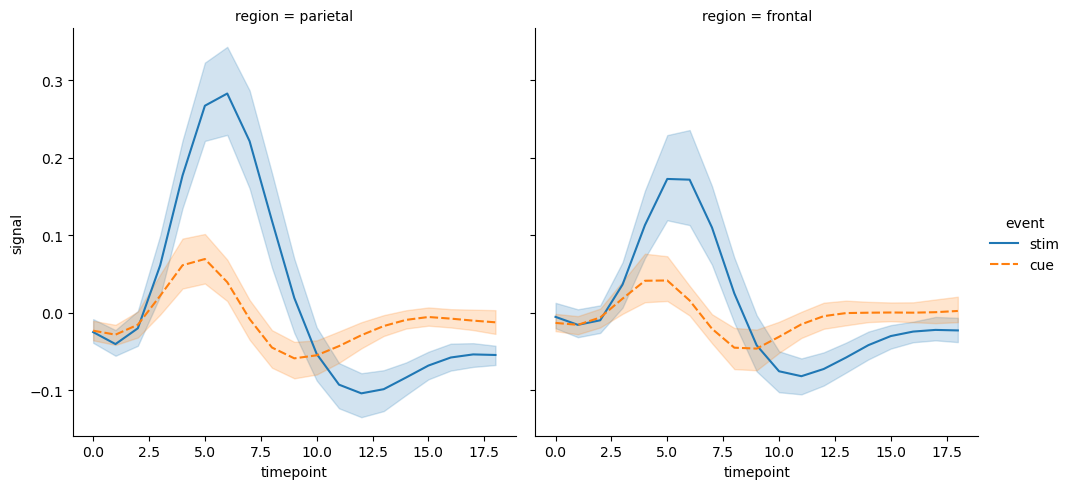

In [21]:
fmri = sns.load_dataset('fmri')
sns.relplot(
    data=fmri, kind='line',
    x='timepoint', y='signal', col ='region',
    hue = 'event', style='event')

<!-- When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot(): -->

seaborn은 통계값이 추정되면 (부트스트래핑을 사용하여) 신뢰 구간을 계산하고 추정치의 불확실성을 나타내는 오차 막대를 그립니다.
seaborn의 통계적 추정은 기술 통계를 뛰어 넘습니다. 
예를 들어, lmplot()을 사용하여 선형 회귀 모델(및 불확실성)을 포함하여 산점도를 향상시킬 수 있습니다.

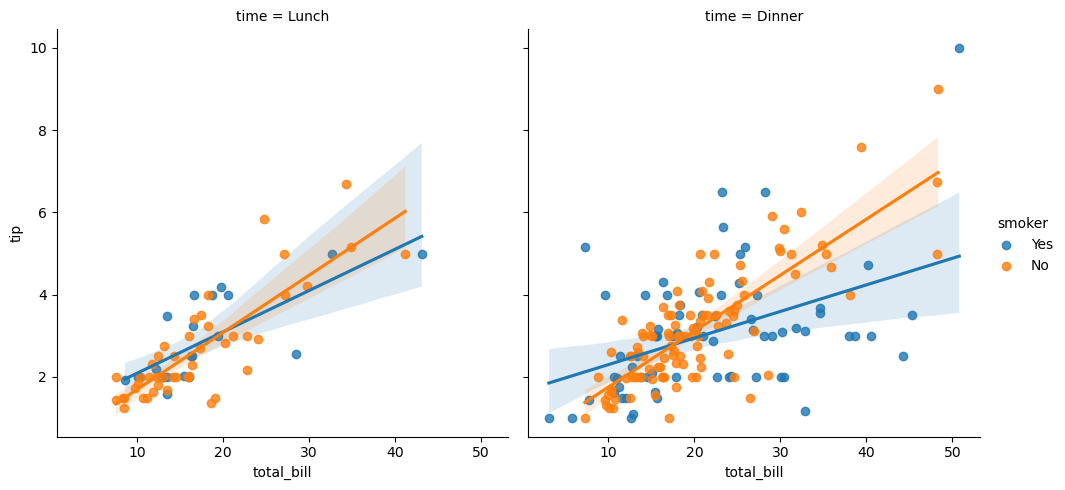

In [23]:
tips = sns.load_dataset('tips')
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

# Distributional representations

<!-- Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation: -->

displot() 은 데이터 시각화에 다양한 접근을 
히스토그램처럼 고전적인 기술 &  커널 밀도 추정과 같은 계산집약적 인 접근 방식이 포함

커널 밀도추정 ? = >  커널함수를 통한 밀도 추정 => 그럼 밀도추정은 ?
density estimation(밀도추정) : 
하나의 데이터는 변수의 일면에 불과하기 때문에 변수의 진면목을 파악하기 위해서는 많은 수의 데이터가 필요하다. 
이런 데이터들의 분포로부터 원래 변수의 (확률) 분포 특성을 추정하고자 하는 것

<!-- 예를 들어, 어떤 육교 밑을 통과하는 차량의 일일 교통량을 파악하는게 목적이라고 하자. 이 때의 변수(random variable)는 '일일 교통량'이다. 그리고 실제 육교 위에서 매일 매일 관찰한 값이 데이터이다. 어떤 날은 차가 500대 지나가고, 어떤 날은 300대, 450대, ... 매일 매일 서로 다른 데이터가 나올 수 있다. 하루, 이틀의 관측 결과만 가지고 이 육교의 '일일 교통량'이 무어라고 결론을 내리기는 힘들다. 하지만 이러한 데이터가 한달, 두달, 1년 넘게 쌓이게 되면 우리는 '일일 교통량'이란 변수가 어떤 값의 분포 특성을 갖는지 좀더 정확히 파악할 수 있게 된다. 그리고 어떤 변수가 가질 수 있는 값 및 그 값을 가질 가능성의 정도를 추정하는 것이 density estimation -->

<!-- 출처 : https://darkpgmr.tistory.com/147 -->

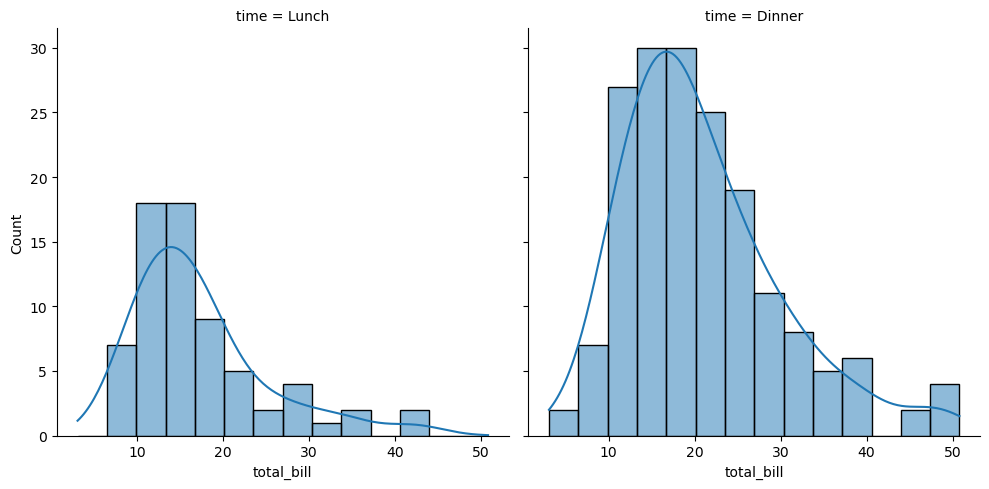

In [24]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
# 수치변수의 분포를 알기 용이함
# kde = 커널밀도 추정 곡선

Seaborn은 또한 데이터의누적 분포 함수를 계산하고 플로팅하는 기술 보유

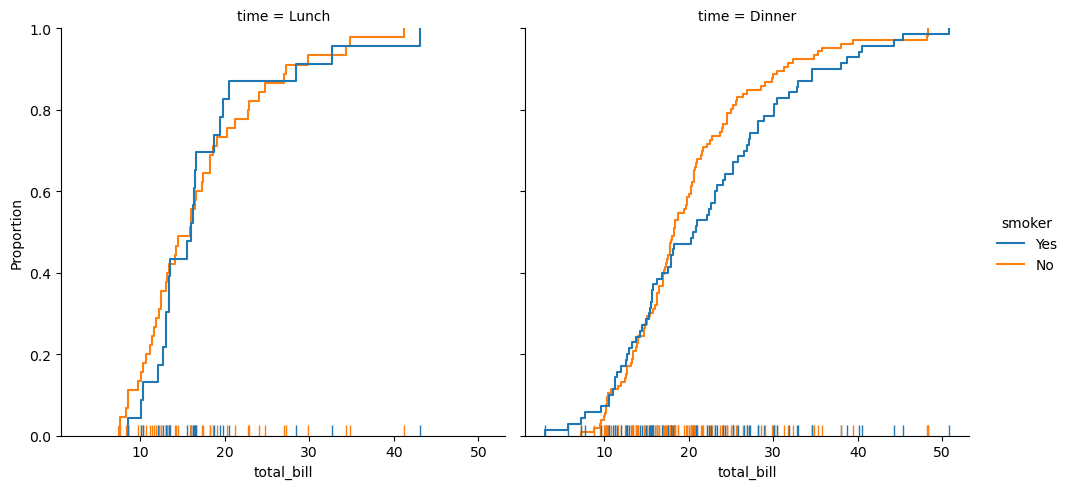

In [30]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
# rug : bool
#   If True, show each observation with marginal ticks (as in :func:`rugplot`).
# rug의 유무 차이는 밑에 xlabel 쪽에 잡다한선들이 생김..

Plots for categorical data

<!-- Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through catplot(). These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a “swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap: -->

Seaborn에는 범주형 데이터들의 시각화에 특화된 플롯들이 있다.
catplot() => 다양한 수준의 세분성 제공
=> 최종적으로는 'swarm' plot 사용
swarmplot() : 범주형 축에 점의 위치가 겹치지 않게 하는 산점도

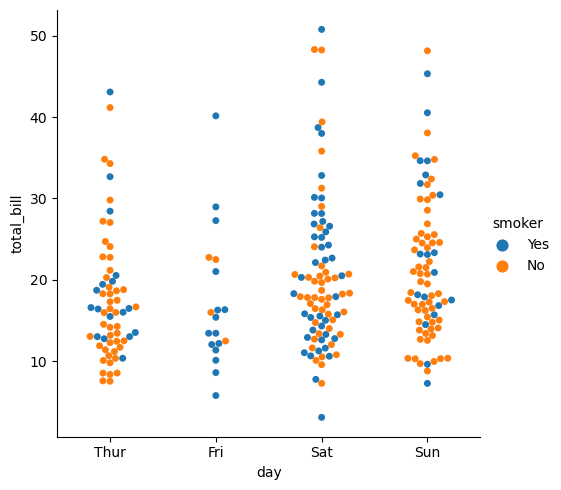

In [31]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

커널 밀도 추정을 사용하여 점이 샘플링되는 기본 분포

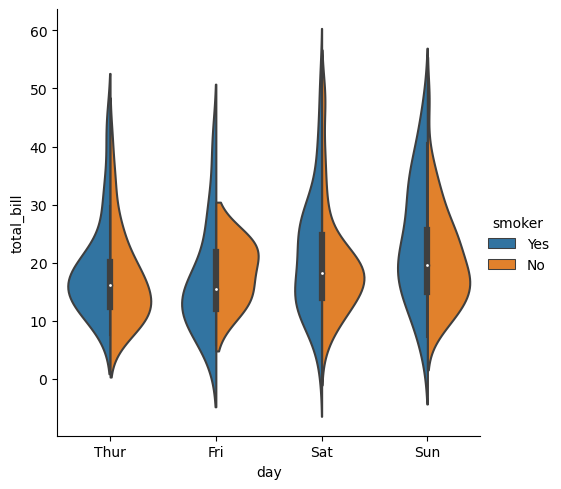

In [32]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

In [ ]:
중첩 범주 내에서 평균값과 신뢰 구간만 표시

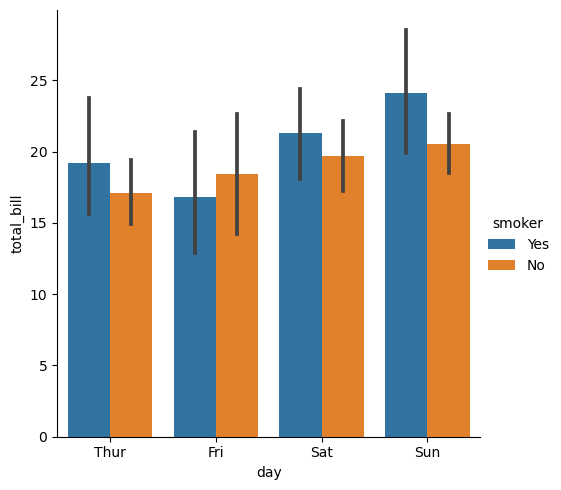

In [33]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")